### Dependencies:

In [79]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import time
from PIL import Image
from IPython.display import display, clear_output

In [4]:
test_image = cv2.imread("Datasets/tomato/train/Tomato___healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG")

In [19]:
test_image.shape

(256, 256, 3)

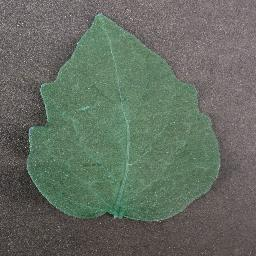

In [7]:
display(Image.fromarray(test_image))

### Collecting Healthy Data:

In [47]:
directory = "Datasets/tomato/train/Tomato___healthy/"

count = 0

for filename in os.listdir(directory):
    if filename.endswith(".JPG"):
        image = cv2.imread(directory + filename)
        image_vector = np.reshape(image, (image.shape[0] * image.shape[1] * image.shape[2], 1))
        if count == 0:
            X_healthy = image_vector
        else:
            X_healthy = np.concatenate((X_healthy, image_vector), axis = 1)
        clear_output(wait = True)
        print("Number of pictures processed = ", count + 1)
        count += 1

Number of pictures processed =  1000


In [48]:
X_healthy.shape

(196608, 1000)

In [49]:
Y_healthy = np.ones((1, X_healthy.shape[1]))

In [50]:
Y_healthy.shape

(1, 1000)

In [51]:
Healthy_Data = np.concatenate((Y_healthy, X_healthy), axis = 0)

In [52]:
Healthy_Data[0][28]

1.0

In [63]:
directory = "Datasets/tomato/train/"

num_pictures_per_disease = 150
count = 0
started = 0

for filename in os.listdir(directory):
    if filename != "Tomato___healthy":
        filename = directory + filename + "/"
        print(filename)
        for file in os.listdir(filename):
            if (count % num_pictures_per_disease != 0) or count == 0:
                image = cv2.imread(filename + file)
                image_vector = np.reshape(image, (image.shape[0] * image.shape[1] * image.shape[2], 1))
                if started == 0:
                    X_diseased = image_vector
                    started = 1
                else:
                    X_diseased = np.concatenate((X_diseased, image_vector), axis = 1)
                clear_output(wait = True)
                print("Number of pictures processed = ", count + 1)
                count += 1
            else:
                count = 0
                break
    print("Directory done")
    time.sleep(3)
    
print("DONE")

Number of pictures processed =  150
Directory done
DONE


In [64]:
X_diseased.shape

(196608, 1350)

In [65]:
Y_diseased = np.zeros((1, X_diseased.shape[1]))

In [66]:
Y_diseased.shape

(1, 1350)

In [67]:
Diseased_Data = np.concatenate((Y_diseased, X_diseased), axis = 0)

In [68]:
Data = np.concatenate((Diseased_Data, Healthy_Data), axis = 1)

In [69]:
Data.shape

(196609, 2350)

In [82]:
Data_pd = pd.DataFrame(Data.T)

In [85]:
Data_pd

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,196608
2284,1.0,183.0,169.0,171.0,152.0,138.0,140.0,177.0,163.0,165.0,...,153.0,156.0,138.0,145.0,88.0,70.0,77.0,255.0,246.0,253.0
1518,1.0,111.0,93.0,100.0,110.0,92.0,99.0,108.0,90.0,97.0,...,113.0,205.0,184.0,186.0,118.0,97.0,99.0,123.0,102.0,104.0
1176,0.0,140.0,109.0,116.0,140.0,109.0,116.0,141.0,110.0,117.0,...,108.0,124.0,93.0,96.0,102.0,71.0,74.0,114.0,83.0,86.0
553,0.0,122.0,104.0,111.0,120.0,102.0,109.0,120.0,102.0,109.0,...,201.0,157.0,140.0,144.0,187.0,170.0,174.0,176.0,159.0,163.0
2000,1.0,118.0,115.0,117.0,117.0,114.0,116.0,119.0,116.0,118.0,...,62.0,56.0,54.0,54.0,72.0,70.0,70.0,64.0,62.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,1.0,154.0,133.0,135.0,177.0,156.0,158.0,168.0,147.0,149.0,...,138.0,127.0,112.0,120.0,119.0,104.0,112.0,111.0,96.0,104.0
14,0.0,120.0,118.0,130.0,107.0,105.0,117.0,129.0,127.0,139.0,...,160.0,159.0,157.0,163.0,158.0,156.0,162.0,154.0,152.0,158.0
353,0.0,139.0,137.0,137.0,133.0,131.0,131.0,131.0,129.0,129.0,...,86.0,94.0,89.0,90.0,96.0,91.0,92.0,97.0,92.0,93.0
1494,1.0,113.0,109.0,114.0,132.0,128.0,133.0,100.0,96.0,101.0,...,93.0,79.0,74.0,75.0,88.0,83.0,84.0,82.0,77.0,78.0


In [84]:
Data_pd = Data_pd.sample(frac = 1)

In [86]:
Data_shuffled = Data_pd.to_numpy()
Data_shuffled = Data_shuffled.T
Data_shuffled

array([[  1.,   1.,   0., ...,   0.,   1.,   0.],
       [183., 111., 140., ..., 139., 113., 152.],
       [169.,  93., 109., ..., 137., 109., 139.],
       ...,
       [255., 123., 114., ...,  97.,  82., 189.],
       [246., 102.,  83., ...,  92.,  77., 178.],
       [253., 104.,  86., ...,  93.,  78., 194.]])

In [87]:
np.save("tomato_data_1000yes_1350no", Data_shuffled)